In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

3.2.1 生成数据集

In [3]:
def synthetiv_data(w, b, num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 生成一个服从标准正态分布的随机矩阵
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetiv_data(true_w, true_b, 1000)

In [5]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.5271,  1.6515]) 
label: tensor([-2.4564])


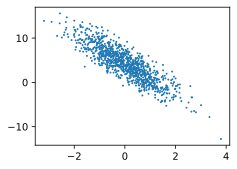

In [6]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

3.2.2 读取数据集

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 样本是随机的，没有顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.1322, -1.1377],
        [ 0.3714,  0.7864],
        [-0.6640, -1.7502],
        [-1.2432,  0.5406],
        [-0.9321,  2.6278],
        [ 0.6902, -0.0497],
        [ 1.1754, -0.2067],
        [ 0.0733, -0.4914],
        [ 0.1843,  0.9895],
        [-0.6123,  0.4225]]) 
 tensor([[ 7.7863],
        [ 2.2715],
        [ 8.8285],
        [-0.1186],
        [-6.6055],
        [ 5.7700],
        [ 7.2519],
        [ 6.0188],
        [ 1.2127],
        [ 1.5438]])


3.2.3 初始化模型参数

In [30]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

3.2.4 定义模型

In [23]:
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

3.2.5 定义损失函数

In [24]:
def squared_loss(y_hat, y): #@save
    """均防损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

3.2.6 定义优化算法

In [25]:
# 小批量随机梯度下降
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad /batch_size
            param.grad.zero_()

In [26]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [32]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.039763
epoch 2, loss 0.000149
epoch 3, loss 0.000050


In [33]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0011, -0.0009], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)
